In [2]:
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import trompy as tp
import matplotlib as mpl


In [40]:
animal="VGP202"
day="025"
date="20221007"


s2p_folder = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\VGP_procd_data_22-12-05\\sub-{}\\ses-{}".format(animal, day)
events_file = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\behav\\sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv".format(animal, day, date)


raw_F = np.load(os.path.join(s2p_folder, 'F.npy'))
neu_F = np.load(os.path.join(s2p_folder, 'Fneu.npy'))
iscell = np.load(os.path.join(s2p_folder, 'iscell.npy'))
stats=np.load(os.path.join(s2p_folder, 'stat.npy'), allow_pickle=True)


print(events_file)

C:\Users\mko102\UiT Office 365\O365-Pipette 2 - Dokumenter\People\Mette\GitHub\2P\Processed\behav\sub-VGP202\ses-025-20221007\sub-VGP202_ses-025_events.csv


In [41]:
stats[24]['med']

[189, 151]

In [42]:
neu_F.shape

(62, 11816)

In [43]:
cell_idx = 10

r = raw_F[cell_idx, :]
x = raw_F[cell_idx, :] - neu_F[cell_idx, :]
x7 = raw_F[cell_idx, :] - 0.7 * neu_F[cell_idx, :]
print('len X:',len(x))

#zscore

z = (r - np.mean(r))/np.std(r)

#df/f
df = r-np.mean(r)

#filter
t = np.arange(0,len(x)/10,0.1)
filt = signal.butter(4, 1, 'low', fs=10, output='sos')
filtered = signal.sosfilt(filt, z)

len X: 11816


(500.0, 700.0)

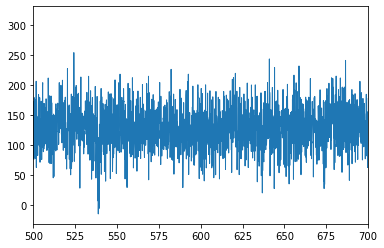

In [44]:
f, ax = plt.subplots()
ax.plot(t, x, linewidth=1)
# ax.plot(t, filtered, linewidth=1)
#ax.set_ylim(16800, 17000)

ax.set_xlim([500, 700])

In [45]:
np.shape(raw_F)

(62, 11816)

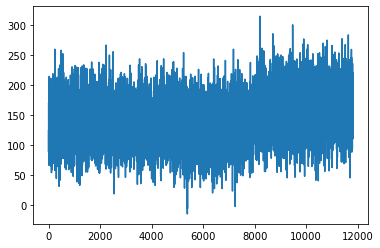

In [46]:
n = neu_F[cell_idx, :]
plt.plot(x)

In [47]:
import pandas as pd

df = pd.read_csv(events_file)

pump_frames = list(df[df['Item1'] == 'pump_on']['Item2.Item2'])

pump_frames=[frame for frame in pump_frames if frame < len(z)-100] #removes event if too close to the end

licks_frames = list (df[df['Item1']== 'Lick']['Item2.Item2'])
licks_frames=[frame for frame in licks_frames if frame < len(z)-100]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\behav\\sub-VGP202\\ses-025-20221007\\sub-VGP202_ses-025_events.csv'

In [ ]:
df

In [ ]:
snips = []
for p in pump_frames:
    snips.append(filtered[p-50:p+100]) 

In [48]:
# excluding missed trials 
# List of hit and missed trieals

hit=[]
miss=[]
licks=[]
for p in pump_frames: 
    temp=[]
    for lick in licks_frames: 
        if lick > p and lick < p + 100:
            temp.append(lick)
            
    if len(temp) > 0: 
        hit.append(p) # list of frame number of pump on in trials WITH liskc
    if len(temp) == 0: 
        miss.append(p) # list of frame number of pump on in trials WITHOUT liskc
        
    licks.append(temp) # to get list of licks in each trial 
        
temp_l=[]
for trial in licks: 
    if len(trial) > 0: 
        temp_l.append(trial[:1])     # Makes a list of lists (frame number of first lick in hit trials)
        
#List comprehension to convert list of lists to flat list 
first_lick=[trial for sublist in temp_l for trial in sublist]  



print('hit', hit)
print('miss', miss)
print('lick', first_lick)




hit [1387, 1630, 1990, 3554, 4197, 4848, 5118, 6333, 6601, 7874, 9809, 10133, 10361]
miss [235, 556, 801, 1053, 2226, 2553, 2856, 3207, 3854, 4540, 5362, 5729, 6082, 6968, 7213, 7514, 8242, 8514, 8842, 9101, 9471, 10689, 10985, 11285]
lick [1439, 1640, 2065, 3601, 4291, 4900, 5172, 6363, 6628, 7915, 9816, 10221, 10455]


In [49]:
# # List of first lick in trial 

# licks=[]

# for p in pump_frames: 
#     temp=[]
#     for l in licks_frames: 
#         if l > p and l < p + 100: 
#             temp.append(l)
#     licks.append(temp)

# temp_l=[]
# for trial in licks: 
#     if len(trial) > 0: 
#         temp_l.append(trial[:1])
        
# #List comprehension to convert list of lists to flat list 
# first_lick=[trial for sublist in temp_l for trial in sublist]

        
        

# first_lick

In [50]:
#snips in hit and missed trials and first lick in trial 

snips_hit=[]
for p in hit: 
    snips_hit.append(filtered[p-50:p+100])
    
    
snips_miss=[]
for p in miss: 
    snips_miss.append(filtered[p-50:p+100])
    
snips_lick=[]
for p in first_lick:
    snips_lick.append(filtered[p-50:p+100])
    
    
print(len(snips_hit))
print(len(snips_miss))
print(len(snips_lick))

13
24
13


In [51]:



len(snips)

37

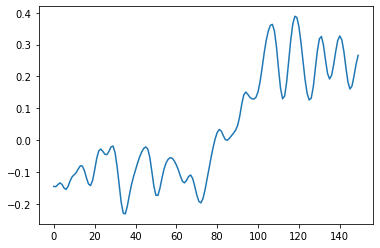

In [52]:
#all tirals

plt.plot(np.mean(snips, axis=0))


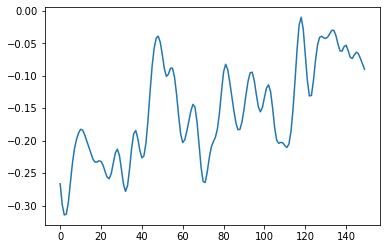

In [53]:
#fist lick

plt.plot(np.mean(snips_lick, axis=0))

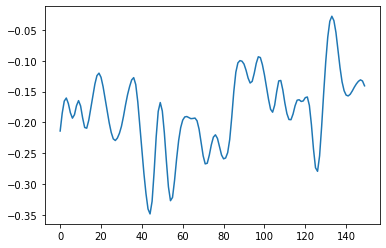

In [54]:
# hit trials

plt.plot(np.mean(snips_hit, axis=0))

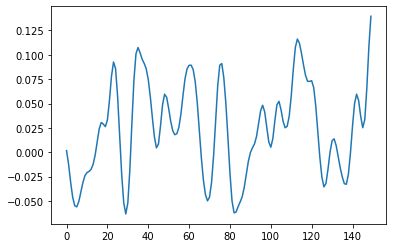

In [55]:
# missed trials
plt.plot(np.mean(snips_miss, axis=0))

In [56]:
# f,ax=plt.subplots (figsize=(9,6), ncols=2, nrows=2, sharey=False)
# f.subplots_adjust(wspace=0.2, hspace=0.5,bottom=0.15, left=0.3)

# tp.shadedError(snips,
#                ax=ax[0][0])

# tp.shadedError(snips_hit, 
#               ax=ax[0][1])

# tp.shadedError(snips_miss,
#               ax=ax[1][0])

# tp.shadedError(snips_lick,
#               ax=ax[1][1])

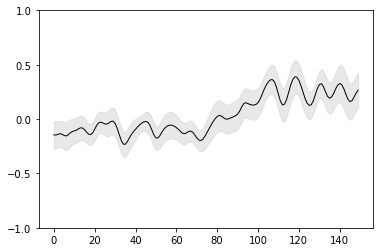

In [57]:
#all trials
f, ax = plt.subplots()
tp.shadedError(ax, snips)
ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
# f.savefig('PR_all_malt.pdf')

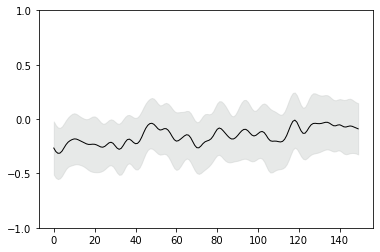

In [58]:
# licks trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_lick)
ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
# f.savefig('PR_hit_malt.pdf')

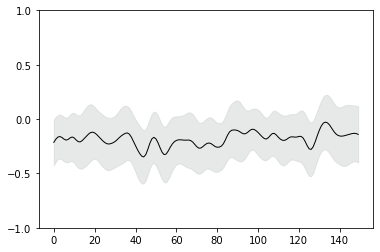

In [59]:
# hit trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_hit)
ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
# f.savefig('PR_hit_malt.pdf')

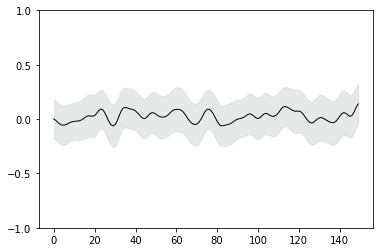

In [60]:
# miss trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_miss)

ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])

# f.savefig('PR_miss_malt.pdf')

In [61]:
# tp.makeheatmap?

In [62]:
cell_idx = [idx for idx,vals in enumerate(iscell) if vals[0]==1]

In [63]:
len(cell_idx)

30

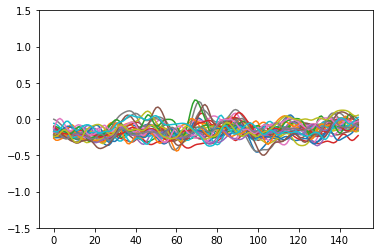

In [64]:
def filter_cell(x):

    t = np.arange(0,len(x)/10,0.1)
    filt = signal.butter(4, 1, 'low', fs=10, output='sos')
    filtered = signal.sosfilt(filt, x)
    
    return filtered
    

f, ax =plt.subplots()

avg_pump = np.zeros((len(cell_idx), 150))
avg_hit = np.zeros((len(cell_idx), 150))
avg_miss = np.zeros((len(cell_idx), 150))

for i, cell in enumerate(cell_idx):
    x = raw_F[cell, :] - 0.7*(neu_F[cell, :])
    x = raw_F[cell, :]
    x = (x - np.mean(x))/np.std(x)
    x = filter_cell(x)
    
    snips = []
    for p in pump_frames:
        snips.append(x[p-50:p+100])
    
    
    hit=[]
    miss=[]
    for p in pump_frames: 
        temp=[]
        for lick in licks_frames: 
            if lick > p and lick < p + 100:
                temp.append(lick)
        if len(temp) > 0: 
            hit.append(p)
        if len(temp) == 0: 
            miss.append(p)
            
    snips_hit=[]
    for p in hit: 
        snips_hit.append(x[p-50:p+100])
        
    snips_miss=[]
    for p in miss: 
        snips_miss.append(x[p-50:p+100])
    
    avg = np.mean(snips, axis=0)
    
    avg_h = np.mean(snips_hit, axis=0)
    
    avg_m = np.mean(snips_miss, axis=0)
    
    ax.plot(avg_h)
    ax.set_yticks([-1.5,-1.0,-0.5, 0,  0.5, 1.0, 1.5])
    avg_pump[i,:] = avg
    avg_hit[i,:] =avg_h
    avg_miss[i,:]=avg_m
    


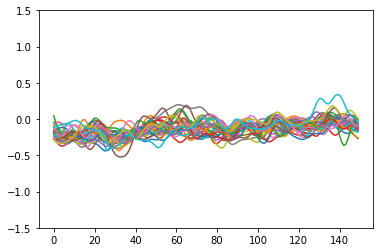

In [65]:
#Licks trial 

def filter_cell(x):

    t = np.arange(0,len(x)/10,0.1)
    filt = signal.butter(4, 1, 'low', fs=10, output='sos')
    filtered = signal.sosfilt(filt, x)
    
    return filtered
    

f, ax =plt.subplots()

avg_pump = np.zeros((len(cell_idx), 150))
avg_hit = np.zeros((len(cell_idx), 150))
avg_miss = np.zeros((len(cell_idx), 150))
avg_lick = np.zeros((len(cell_idx), 150))
for i, cell in enumerate(cell_idx):
    x = raw_F[cell, :] - 0.7*(neu_F[cell, :])
    x = raw_F[cell, :]
    x = (x - np.mean(x))/np.std(x)
    x = filter_cell(x)
    
    snips = []
    for p in pump_frames:
        snips.append(x[p-50:p+100])
    
    
    hit=[]
    miss=[]
    for p in pump_frames: 
        temp=[]
        for lick in licks_frames: 
            if lick > p and lick < p + 100:
                temp.append(lick)
        if len(temp) > 0: 
            hit.append(p) # list of frame number of pump on in trials WITH liskc
        if len(temp) == 0: 
            miss.append(p)
        
        licks.append(temp) # to get list of licks in each trial 
        
        
    temp_l=[]
    for trial in licks: 
        if len(trial) > 0: 
            temp_l.append(trial[:1])     # Makes a list of lists (frame number of first lick in hit trials)
        
    #List comprehension to convert list of lists to flat list 
    first_lick=[trial for sublist in temp_l for trial in sublist]  
            
    snips_hit=[]
    for p in hit: 
        snips_hit.append(x[p-50:p+100])
        
    snips_lick=[]
    for p in first_lick:
        snips_lick.append(x[p-50:p+100])
    
    avg = np.mean(snips, axis=0)
    
    avg_h = np.mean(snips_hit, axis=0)
    
    avg_l = np.mean (snips_lick, axis=0)
    
    ax.plot(avg_l)
    ax.set_yticks([-1.5,-1.0,-0.5, 0,  0.5, 1.0,1.5])
    avg_pump[i,:] = avg
    avg_hit[i,:] =avg_h
    avg_lick[i,:] =avg_l


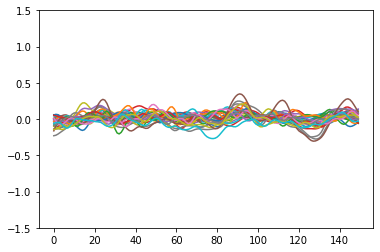

In [66]:
def filter_cell(x):

    t = np.arange(0,len(x)/10,0.1)
    filt = signal.butter(4, 1, 'low', fs=10, output='sos')
    filtered = signal.sosfilt(filt, x)
    
    return filtered
    

f, ax =plt.subplots()

avg_pump = np.zeros((len(cell_idx), 150))
avg_hit = np.zeros((len(cell_idx), 150))
avg_miss = np.zeros((len(cell_idx), 150))

for i, cell in enumerate(cell_idx):
    x = raw_F[cell, :] - 0.7*(neu_F[cell, :])
    x = raw_F[cell, :]
    x = (x - np.mean(x))/np.std(x)
    x = filter_cell(x)
    
    snips = []
    for p in pump_frames:
        snips.append(x[p-50:p+100])
    
    
    hit=[]
    miss=[]
    for p in pump_frames: 
        temp=[]
        for lick in licks_frames: 
            if lick > p and lick < p + 100:
                temp.append(lick)
        if len(temp) > 0: 
            hit.append(p)
        if len(temp) == 0: 
            miss.append(p)
            
    snips_hit=[]
    for p in hit: 
        snips_hit.append(x[p-50:p+100])
        
    snips_miss=[]
    for p in miss: 
        snips_miss.append(x[p-50:p+100])
    
    avg = np.mean(snips, axis=0)
    
    avg_h = np.mean(snips_hit, axis=0)
    
    avg_m = np.mean(snips_miss, axis=0)
    
    ax.plot(avg_m)
    ax.set_yticks([-1.5,-1.0,-0.5, 0,  0.5, 1.0, 1.5])
    avg_pump[i,:] = avg
    avg_hit[i,:] =avg_h
    avg_miss[i,:]=avg_m
    


In [67]:
maxsignal_hit=[np.max(signal[50:100]) for signal in avg_hit]
maxsignal_lick=[np.max(signal[50:100]) for signal in avg_lick]
maxsignal_miss=[np.max(signal[50:100]) for signal in avg_miss]

In [68]:
def make_heatmap(data, events=None, ax=None, cmap="jet", sort=True, ylabel="Trials", clims=[-0.45,0.8]):

    if ax == None:
        f, ax = plt.subplots()

    (ntrials, bins) = np.shape(data)
    
    print(ntrials, bins)
    

    xvals = np.linspace(-5,10,bins)
    yvals = np.arange(0, ntrials)
    xx, yy = np.meshgrid(xvals, yvals)

    if sort == True:
        try:
            inds = np.argsort(events)
            data = [data[i] for i in inds]
            events = [events[i] for i in inds]
        except:
            print("Events cannot be sorted")

    mesh = ax.pcolormesh(xx, yy, data, cmap=cmap, shading="auto")
    mesh.set_clim(clims)

#     if events:
#         ax.vlines(events, yvals-0.5, yvals+0.5, color='w')

#     ax.set_ylabel(ylabel, rotation=90, labelpad=2)

#     ax.invert_yaxis()
#     ax.set_yticks([])
#     ax.set_xticks([])
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)

    return ax, mesh

30 150


Text(0.5, 1.0, 'Casein')

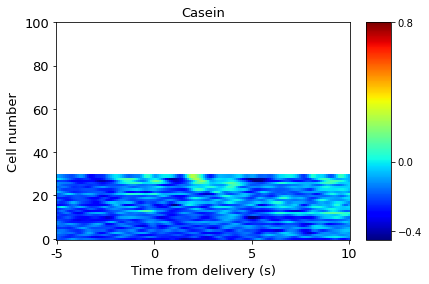

In [69]:
f, [ax1,ax2] = plt.subplots(ncols=2,gridspec_kw={'wspace':0.1,'width_ratios':[12,1]})

ax1,mesh=make_heatmap(avg_hit,events=maxsignal_hit, ax=ax1)



cbar = f.colorbar(mesh, cax=ax2, ticks=[-0.4, 0, 0.8])



ax1.set_ylabel('Cell number',fontsize = 13)
ax1.set_xlabel('Time from delivery (s)', fontsize = 13)
ax1.set_xticks([-5,0,5,10])
ax1.set_xticklabels([-5,0,5,10], fontsize= 13)
ax1.set_yticks([0,20,40,60, 80, 100])
ax1.set_yticklabels([0,20,40,60, 80,100], fontsize= 13)
ax1.set_title('Casein', fontsize=13)


# f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\heatmap_Casein_PR_trial.png')

30 150


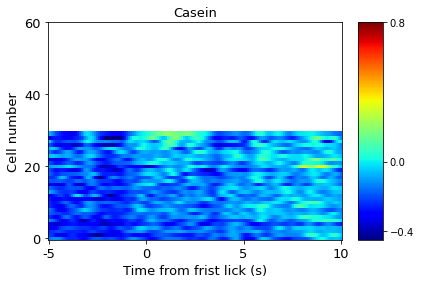

In [70]:
f, [ax1,ax2] = plt.subplots(ncols=2,gridspec_kw={'wspace':0.1,'width_ratios':[12,1]})

ax1,mesh=make_heatmap(avg_lick,events=maxsignal_lick, ax=ax1)



cbar = f.colorbar(mesh, cax=ax2, ticks=[-0.4, 0, 0.8])



ax1.set_ylabel('Cell number',fontsize = 13)
ax1.set_xlabel('Time from frist lick (s)', fontsize = 13)
ax1.set_xticks([-5,0,5,10])
ax1.set_xticklabels([-5,0,5,10], fontsize= 13)
ax1.set_yticks([0,20,40,60])
ax1.set_yticklabels([0,20,40,60], fontsize= 13)
ax1.set_title('Casein', fontsize=13)


f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\heatmap_MALT_PR_lick.png')

30 150
hit trials


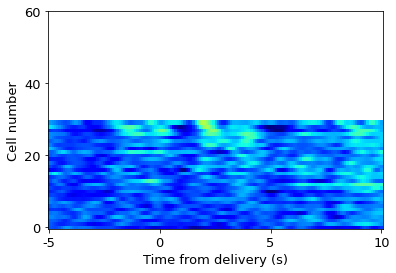

In [71]:
f, ax = plt.subplots()
make_heatmap(avg_hit,events=maxsignal_hit, ax=ax)


ax.set_ylabel('Cell number',fontsize = 13)
ax.set_xlabel('Time from delivery (s)', fontsize = 13)
ax.set_xticks([-5,0,5,10])
ax.set_xticklabels([-5,0,5,10], fontsize= 13)
ax.set_yticks([0,20,40,60])
ax.set_yticklabels([0,20,40,60], fontsize= 13)
# ax.set_title('Signal aligned to delivery', fontsize=13)

print('hit trials')

# f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\hit_trial_malt_PRNR.png')

30 150
lick


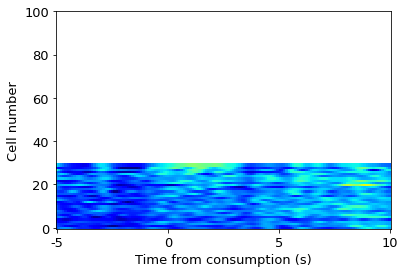

In [72]:
f, ax = plt.subplots()
make_heatmap(avg_lick,events=maxsignal_lick, ax=ax)

ax.set_ylabel('Cell number',fontsize = 13)
ax.set_xlabel('Time from consumption (s)', fontsize = 13)
ax.set_xticks([-5,0,5,10])
ax.set_xticklabels([-5,0,5,10], fontsize= 13)
ax.set_yticks([0,20,40,60,80,100])
ax.set_yticklabels([0,20,40,60,80,100], fontsize= 13)
# ax.set_title('Signal aligned to consumption', fontsize=13)

print('lick')

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\lick_trial_malt_PRNR.png')

30 150
miss trials


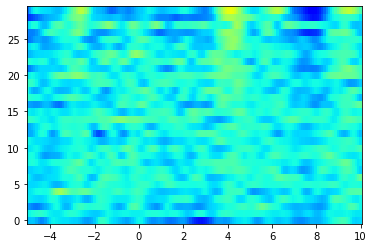

In [73]:
f, ax = plt.subplots()
make_heatmap(avg_miss,events=maxsignal_miss, ax=ax)

print('miss trials')

In [ ]:
np.shape(avg_hit)

In [ ]:
dir(tp)